In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [3]:
df = pd.read_csv("../Data/00.통합.csv")
df.columns

Index(['년도', '시도', '사설학원수', '대학교_숫자', '중학생인원수변화', '초등학생인원수변화', '고등학생인원수변화',
       '유치원원아수변화', '대학생숫자', '의원', '병원', '종합병원', '상급종합병원', '의사', '치과의사', '한의사',
       '약사', '간호사', '기타보건의료인', '주택수', '빈집수', '자동차등록대수', '전입인구', '전출인구', '활동',
       '신생', '소멸', '상용_월평균_임금', '임금상승률', '협회 및 단체, 수리 및 기타 개인서비스업_활동',
       '협회 및 단체, 수리 및 기타 개인서비스업_신생', '협회 및 단체, 수리 및 기타 개인서비스업_소멸',
       '예술, 스포츠 및 여가관련 서비스업_활동', '예술, 스포츠 및 여가관련 서비스업_신생',
       '예술, 스포츠 및 여가관련 서비스업_소멸', '보건업 및 사회복지 서비스업_활동', '보건업 및 사회복지 서비스업_신생',
       '보건업 및 사회복지 서비스업_소멸', '교육서비스업_활동', '교육서비스업_신생', '교육서비스업_소멸',
       '사업 시설관리, 사업지원 및 임대 서비스업_활동', '사업 시설관리, 사업지원 및 임대 서비스업_신생',
       '사업 시설관리, 사업지원 및 임대 서비스업_소멸', '전문, 과학 및 기술서비스업_활동',
       '전문, 과학 및 기술서비스업_신생', '전문, 과학 및 기술서비스업_소멸', '부동산업_활동', '부동산업_신생',
       '부동산업_소멸', '금융 및 보험업_활동', '금융 및 보험업_신생', '금융 및 보험업_소멸', '정보통신업_활동',
       '정보통신업_신생', '정보통신업_소멸', '숙박 및 음식점업_활동', '숙박 및 음식점업_신생', '숙박 및 음식점업_소멸',
       '운수 및 창고업_활동', '운수 및 창고업_신생', '운수 및 창고업_소멸', '도매 및 소매업_활동',
     

In [14]:
# 상관 계수 막대 그래프 찍는 함수 
# a = 시작 컬럼 인덱스, b = 끝 컬럼 인덱스
def makeCorrHeatMap(a, b):
    plt.figure(figsize = (10,6))

    sns.heatmap(
        df.iloc[:,a:b].corr(),
        annot=True,
        annot_kws={"size": 10},
        linewidths= 0.5,
    )
    
    plt.show()

In [130]:
def makeMinMax(a, b):
    count = 0
    for i in range(b - a):
        print(df.columns[a+i], "(", df.iloc[:,a:b].min()[count], "~", df.iloc[:,a:b].max()[count], ")")
        count += 1

### 학교, 학원, 학생수 상관계수

In [11]:
df.columns[2:9]

Index(['사설학원수', '대학교_숫자', '중학생인원수변화', '초등학생인원수변화', '고등학생인원수변화', '유치원원아수변화',
       '대학생숫자'],
      dtype='object')

In [131]:
makeMinMax(2, 9)

사설학원수 ( 101 ~ 21716 )
대학교_숫자 ( 2 ~ 62 )
중학생인원수변화 ( 3797 ~ 458220 )
초등학생인원수변화 ( 7090 ~ 769744 )
고등학생인원수변화 ( 3528 ~ 460580 )
유치원원아수변화 ( 1305 ~ 196618 )
대학생숫자 ( 22558 ~ 575724 )


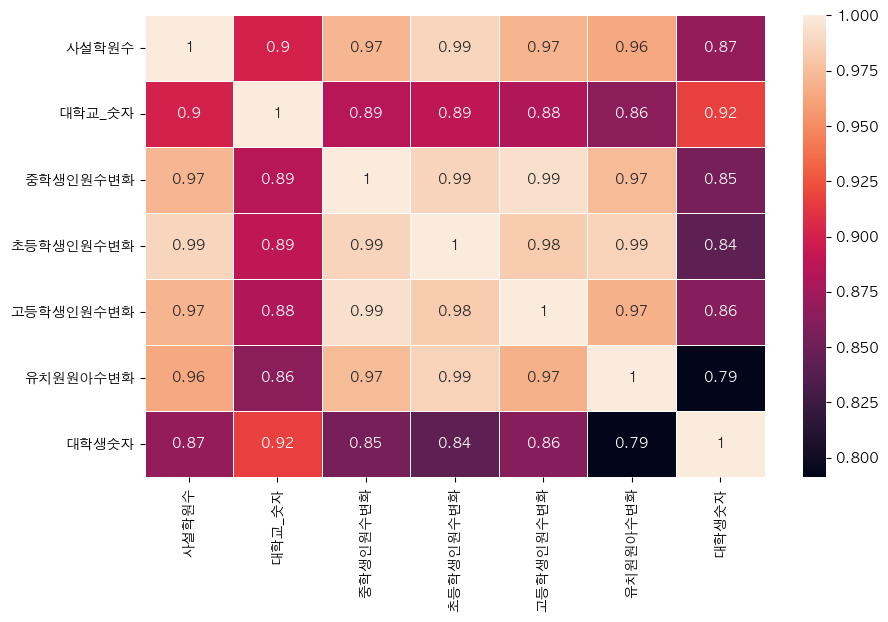

In [15]:
makeCorrHeatMap(2,9)

## 병원, 의사, 약사, 의료인끼리의 상관계수

In [21]:
df.columns[9:19]

Index(['의원', '병원', '종합병원', '상급종합병원', '의사', '치과의사', '한의사', '약사', '간호사',
       '기타보건의료인'],
      dtype='object')

In [132]:
# 단위
makeMinMax(9,19)

의원 ( 57.0 ~ 8884.0 )
병원 ( 0.0 ~ 291.0 )
종합병원 ( 0.0 ~ 62.0 )
상급종합병원 ( 0.0 ~ 17.0 )
의사 ( 96.0 ~ 31140.0 )
치과의사 ( 31.0 ~ 7368.0 )
한의사 ( 33.0 ~ 5073.0 )
약사 ( 64.0 ~ 9516.0 )
간호사 ( 93.0 ~ 54778.0 )
기타보건의료인 ( 60.0 ~ 12724.0 )


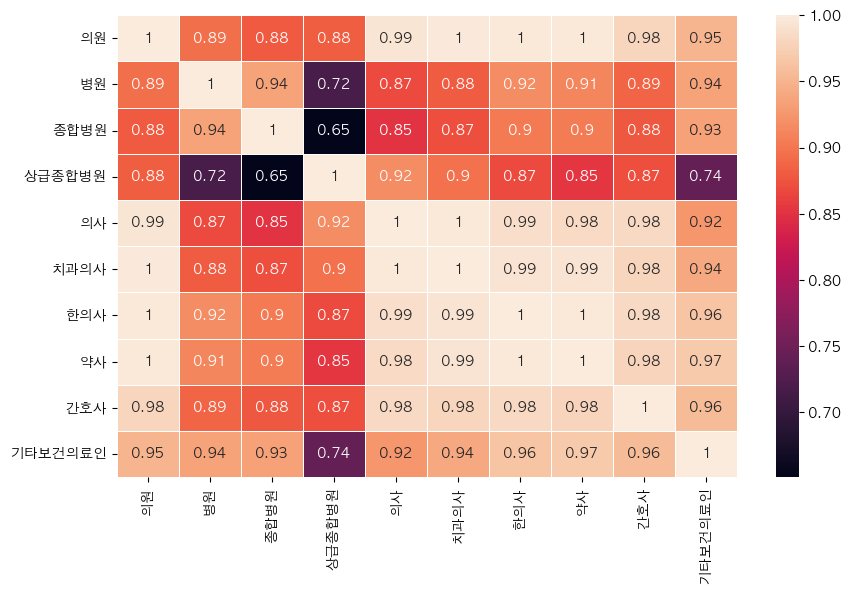

In [22]:
makeCorrHeatMap(9, 19)

## 주택 수, 빈집 수, 자동차 등록 대수

In [26]:
df.columns[19:22]

Index(['주택수', '빈집수', '자동차등록대수'], dtype='object')

In [133]:
# 단위
makeMinMax(19,22)

주택수 ( 81130.0 ~ 4495115.0 )
빈집수 ( 10115.0 ~ 278815.0 )
자동차등록대수 ( 2164838.0 ~ 73393515.0 )


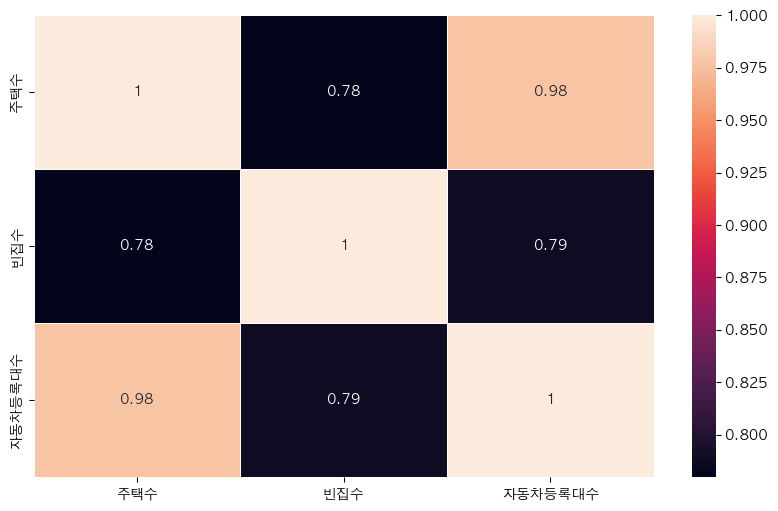

In [27]:
makeCorrHeatMap(19, 22)

## 전입인구, 전출인구 

In [29]:
df.columns[22:24]

Index(['전입인구', '전출인구'], dtype='object')

In [134]:
makeMinMax(22,24)

전입인구 ( 23805 ~ 2152572 )
전출인구 ( 15109 ~ 1984199 )


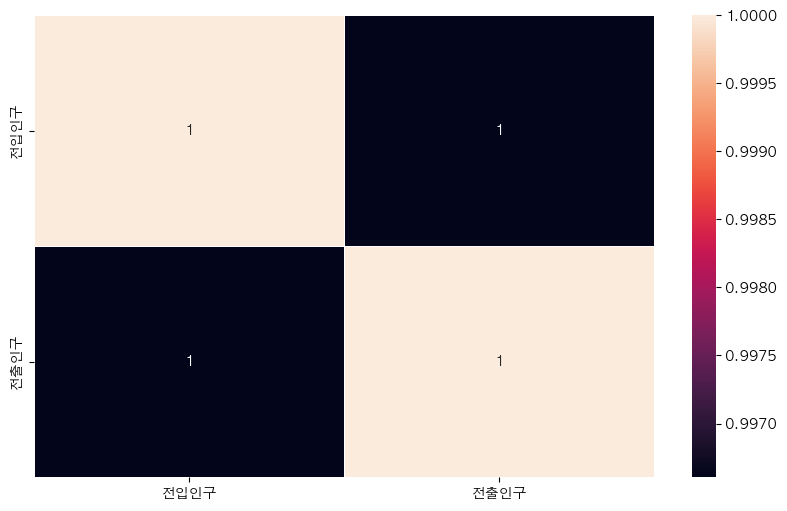

In [30]:
makeCorrHeatMap(22, 24)

## 활동, 신생, 소멸 기업 수

In [34]:
df.columns[24:27]

Index(['활동', '신생', '소멸'], dtype='object')

In [137]:
makeMinMax(24,27)

활동 ( 11658 ~ 1784184 )
신생 ( 2285 ~ 299179 )
소멸 ( 1435 ~ 198673 )


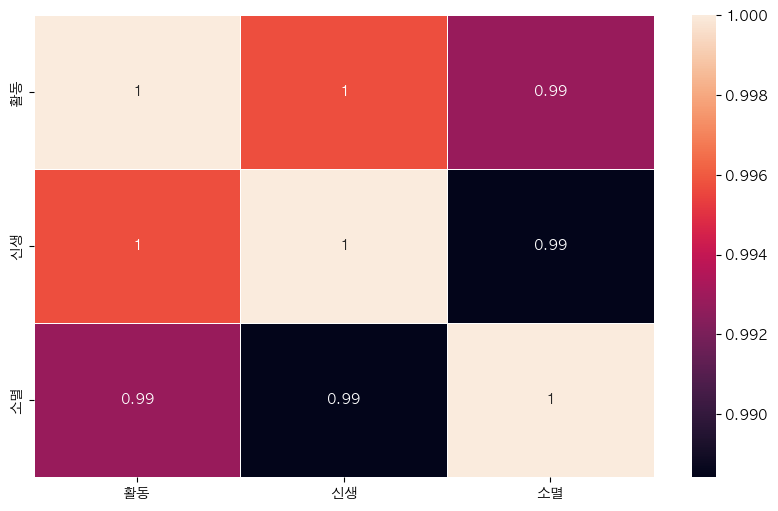

In [35]:
makeCorrHeatMap(24, 27)

## 월평균 임금, 임금 상승률

In [38]:
df.columns[27:29]

Index(['상용_월평균_임금', '임금상승률'], dtype='object')

In [140]:
makeMinMax(27,29)

상용_월평균_임금 ( 0.0 ~ 3745761.0 )
임금상승률 ( -3.5 ~ 6.5 )


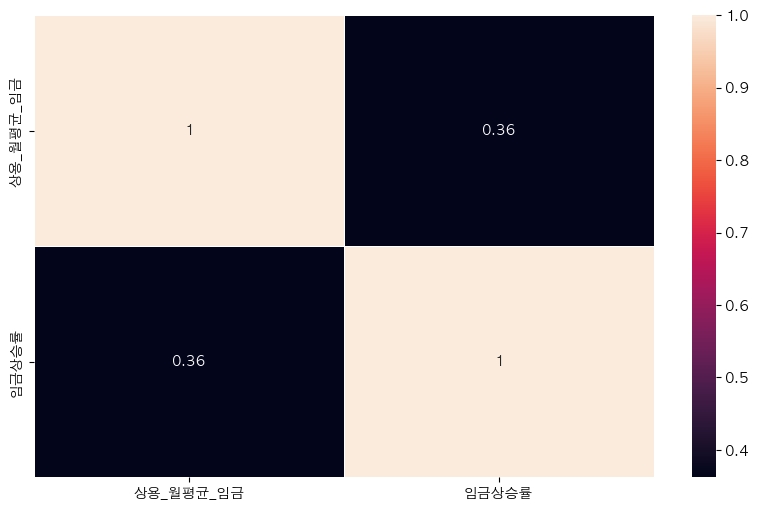

In [39]:
makeCorrHeatMap(27, 29)

In [51]:
df.columns[29:80]

Index(['협회 및 단체, 수리 및 기타 개인서비스업_활동', '협회 및 단체, 수리 및 기타 개인서비스업_신생',
       '협회 및 단체, 수리 및 기타 개인서비스업_소멸', '예술, 스포츠 및 여가관련 서비스업_활동',
       '예술, 스포츠 및 여가관련 서비스업_신생', '예술, 스포츠 및 여가관련 서비스업_소멸',
       '보건업 및 사회복지 서비스업_활동', '보건업 및 사회복지 서비스업_신생', '보건업 및 사회복지 서비스업_소멸',
       '교육서비스업_활동', '교육서비스업_신생', '교육서비스업_소멸', '사업 시설관리, 사업지원 및 임대 서비스업_활동',
       '사업 시설관리, 사업지원 및 임대 서비스업_신생', '사업 시설관리, 사업지원 및 임대 서비스업_소멸',
       '전문, 과학 및 기술서비스업_활동', '전문, 과학 및 기술서비스업_신생', '전문, 과학 및 기술서비스업_소멸',
       '부동산업_활동', '부동산업_신생', '부동산업_소멸', '금융 및 보험업_활동', '금융 및 보험업_신생',
       '금융 및 보험업_소멸', '정보통신업_활동', '정보통신업_신생', '정보통신업_소멸', '숙박 및 음식점업_활동',
       '숙박 및 음식점업_신생', '숙박 및 음식점업_소멸', '운수 및 창고업_활동', '운수 및 창고업_신생',
       '운수 및 창고업_소멸', '도매 및 소매업_활동', '도매 및 소매업_신생', '도매 및 소매업_소멸', '건설업_활동',
       '건설업_신생', '건설업_소멸', '수도, 하수 및 폐기물처리, 원료재생업_활동',
       '수도, 하수 및 폐기물처리, 원료재생업_신생', '수도, 하수 및 폐기물처리, 원료재생업_소멸',
       '전기, 가스, 증기 및 공기조절 공급업_활동', '전기, 가스, 증기 및 공기조절 공급업_신생',
       '전기, 가스, 증기 및 공기조절 공급업_소멸', '제조업_활동', '제조업_신

In [138]:
makeMinMax(29,80)

협회 및 단체, 수리 및 기타 개인서비스업_활동 ( 456 ~ 77741 )
협회 및 단체, 수리 및 기타 개인서비스업_신생 ( 61 ~ 13491 )
협회 및 단체, 수리 및 기타 개인서비스업_소멸 ( 56 ~ 8777 )
예술, 스포츠 및 여가관련 서비스업_활동 ( 213 ~ 33584 )
예술, 스포츠 및 여가관련 서비스업_신생 ( 51 ~ 8560 )
예술, 스포츠 및 여가관련 서비스업_소멸 ( 39 ~ 5637 )
보건업 및 사회복지 서비스업_활동 ( 115 ~ 20123 )
보건업 및 사회복지 서비스업_신생 ( 15 ~ 1666 )
보건업 및 사회복지 서비스업_소멸 ( 5 ~ 1389 )
교육서비스업_활동 ( 264 ~ 47776 )
교육서비스업_신생 ( 72 ~ 10026 )
교육서비스업_소멸 ( 54 ~ 7022 )
사업 시설관리, 사업지원 및 임대 서비스업_활동 ( 180 ~ 38349 )
사업 시설관리, 사업지원 및 임대 서비스업_신생 ( 42 ~ 9286 )
사업 시설관리, 사업지원 및 임대 서비스업_소멸 ( 21 ~ 5615 )
전문, 과학 및 기술서비스업_활동 ( 219 ~ 79148 )
전문, 과학 및 기술서비스업_신생 ( 64 ~ 12625 )
전문, 과학 및 기술서비스업_소멸 ( 16 ~ 6964 )
부동산업_활동 ( 2222 ~ 482682 )
부동산업_신생 ( 596 ~ 97751 )
부동산업_소멸 ( 284 ~ 58163 )
금융 및 보험업_활동 ( 14 ~ 12278 )
금융 및 보험업_신생 ( 2 ~ 2554 )
금융 및 보험업_소멸 ( 2 ~ 2062 )
정보통신업_활동 ( 53 ~ 54756 )
정보통신업_신생 ( 17 ~ 9034 )
정보통신업_소멸 ( 8 ~ 5009 )
숙박 및 음식점업_활동 ( 1826 ~ 185498 )
숙박 및 음식점업_신생 ( 452 ~ 37416 )
숙박 및 음식점업_소멸 ( 287 ~ 30654 )
운수 및 창고업_활동 ( 1428 ~ 157307 )
운수 및 창고업_신생 ( 145 ~ 

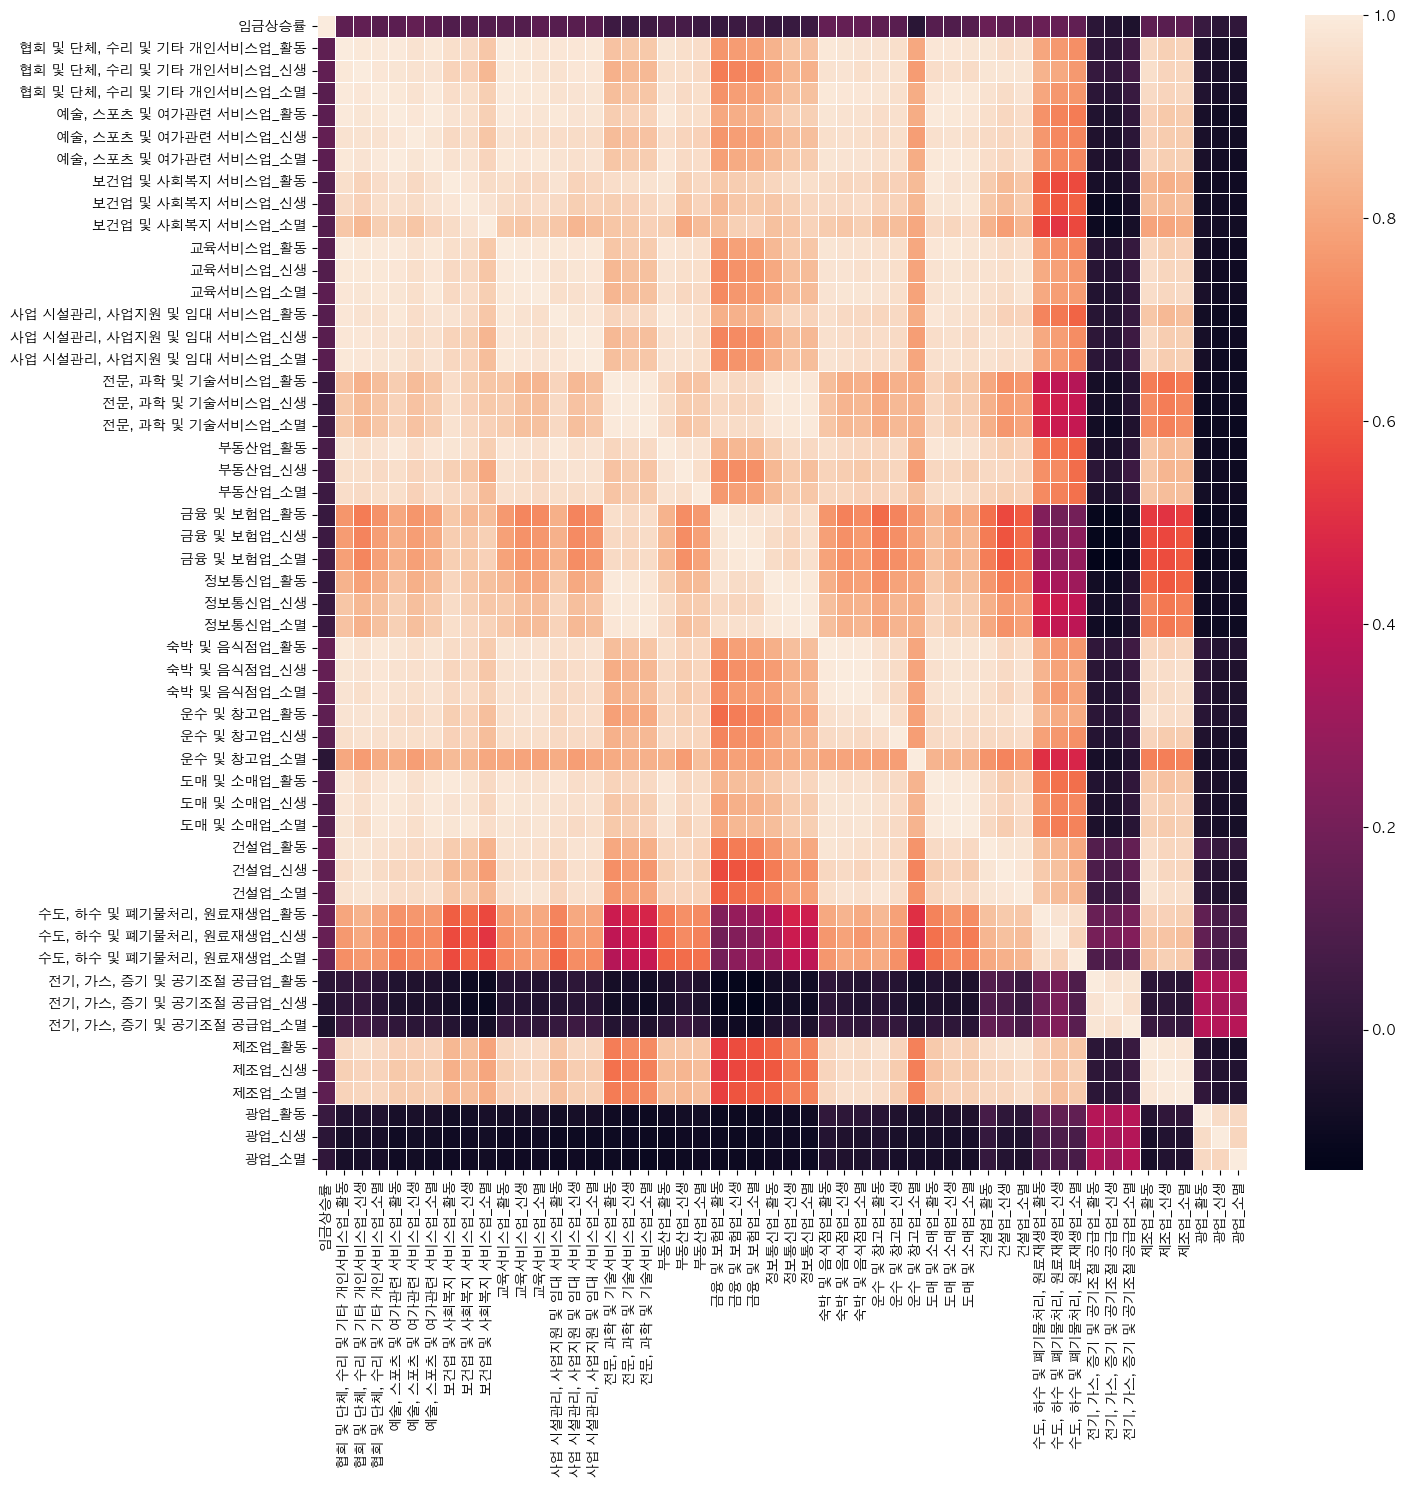

In [54]:
plt.figure(figsize = (15,15))

sns.heatmap(
    df.iloc[:,28:80].corr(),
    # annot=True,
    annot_kws={"size": 10},
    linewidths= 0.5,
)
    
plt.show()

In [57]:
df.columns[80:83]

Index(['총_인구', '남성_인구', '여성_인구'], dtype='object')

In [135]:
makeMinMax(80,83)

총_인구 ( 122153 ~ 13427014 )
남성_인구 ( 62205 ~ 6754469 )
여성_인구 ( 59948 ~ 6672545 )


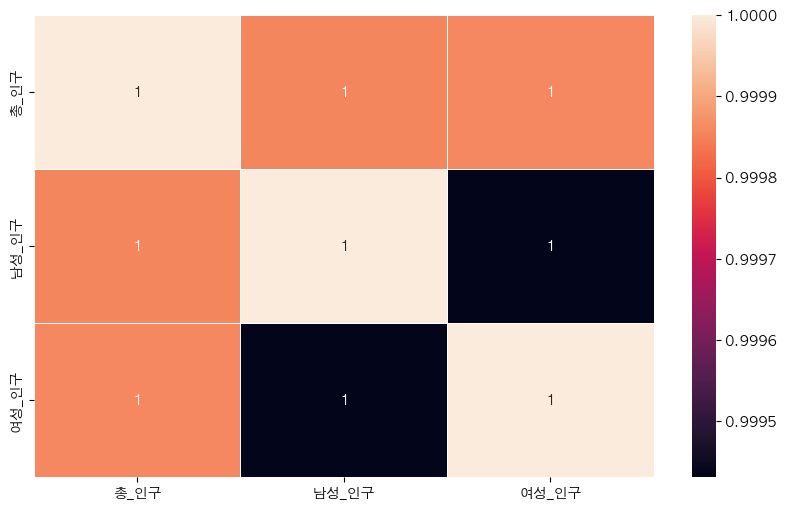

In [58]:
makeCorrHeatMap(80,83)

In [60]:
df.columns[83:85]

Index(['부채', '자산(만원)'], dtype='object')

In [136]:
makeMinMax(83, 85)

부채 ( 4121.0 ~ 11077.0 )
자산(만원) ( 26189.0 ~ 67839.0 )


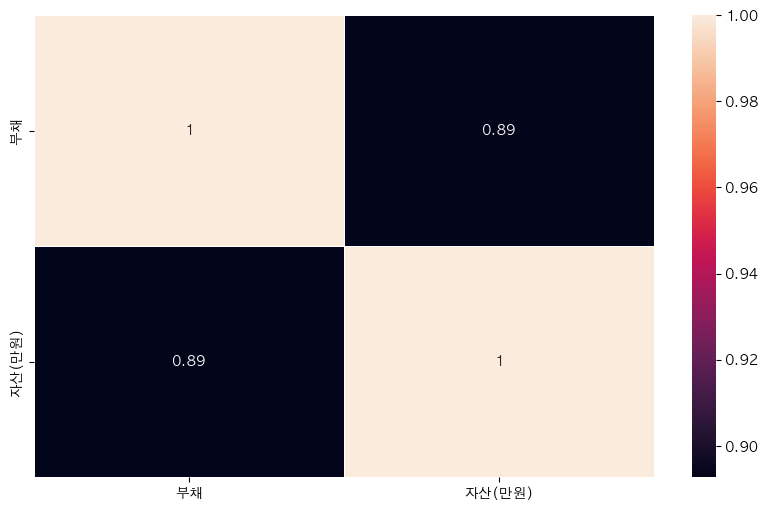

In [61]:
makeCorrHeatMap(83, 85)

In [63]:
df.columns[85:87]

Index(['농가수', '어가수'], dtype='object')

In [139]:
makeMinMax(85,87)

농가수 ( 2751.0 ~ 195108.0 )
어가수 ( 561.0 ~ 21747.0 )


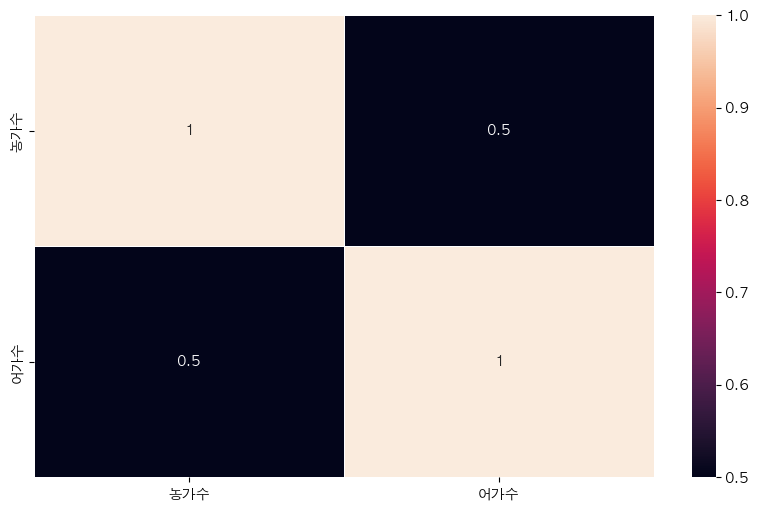

In [64]:
makeCorrHeatMap(85, 87)

In [65]:
df.columns[87:]

Index(['백화점판매액', '대형소매점', '예금은행대출금액', '예금액', '지방세'], dtype='object')

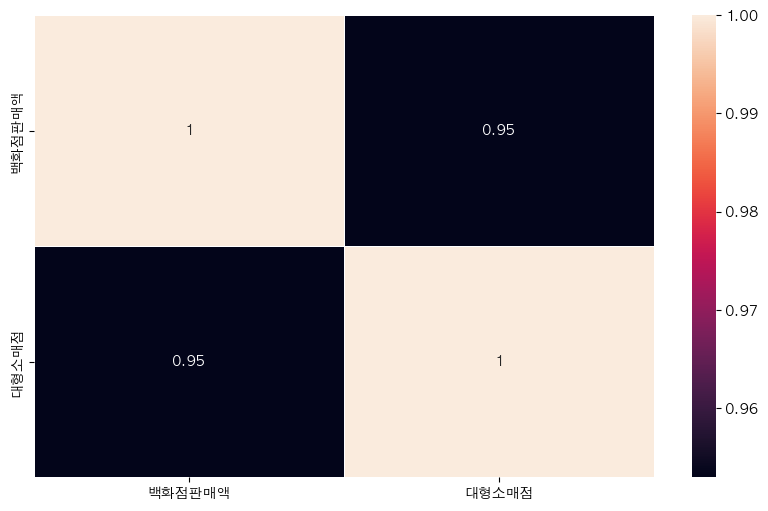

In [66]:
makeCorrHeatMap(87, 89)

In [67]:
df.columns[89:]

Index(['예금은행대출금액', '예금액', '지방세'], dtype='object')

In [141]:
makeMinMax(89,92)

예금은행대출금액 ( 2429.1 ~ 726164.1 )
예금액 ( 1360.9 ~ 898371.8 )
지방세 ( 216598.0 ~ 25801039.0 )


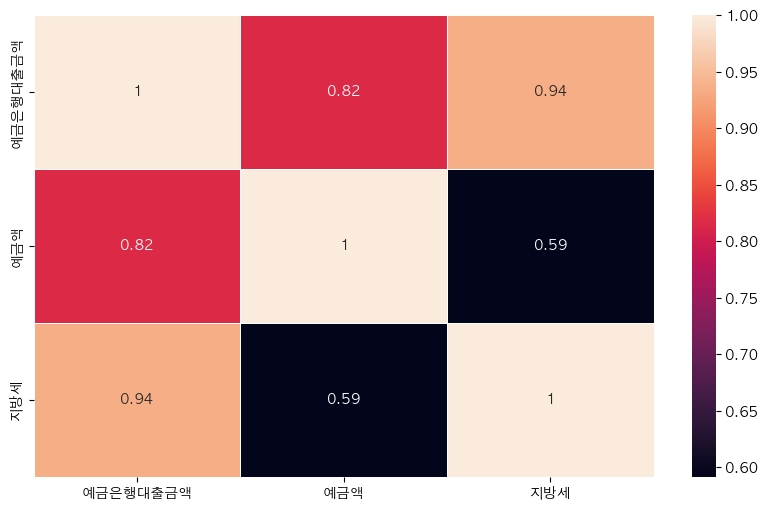

In [71]:
makeCorrHeatMap(89,92)

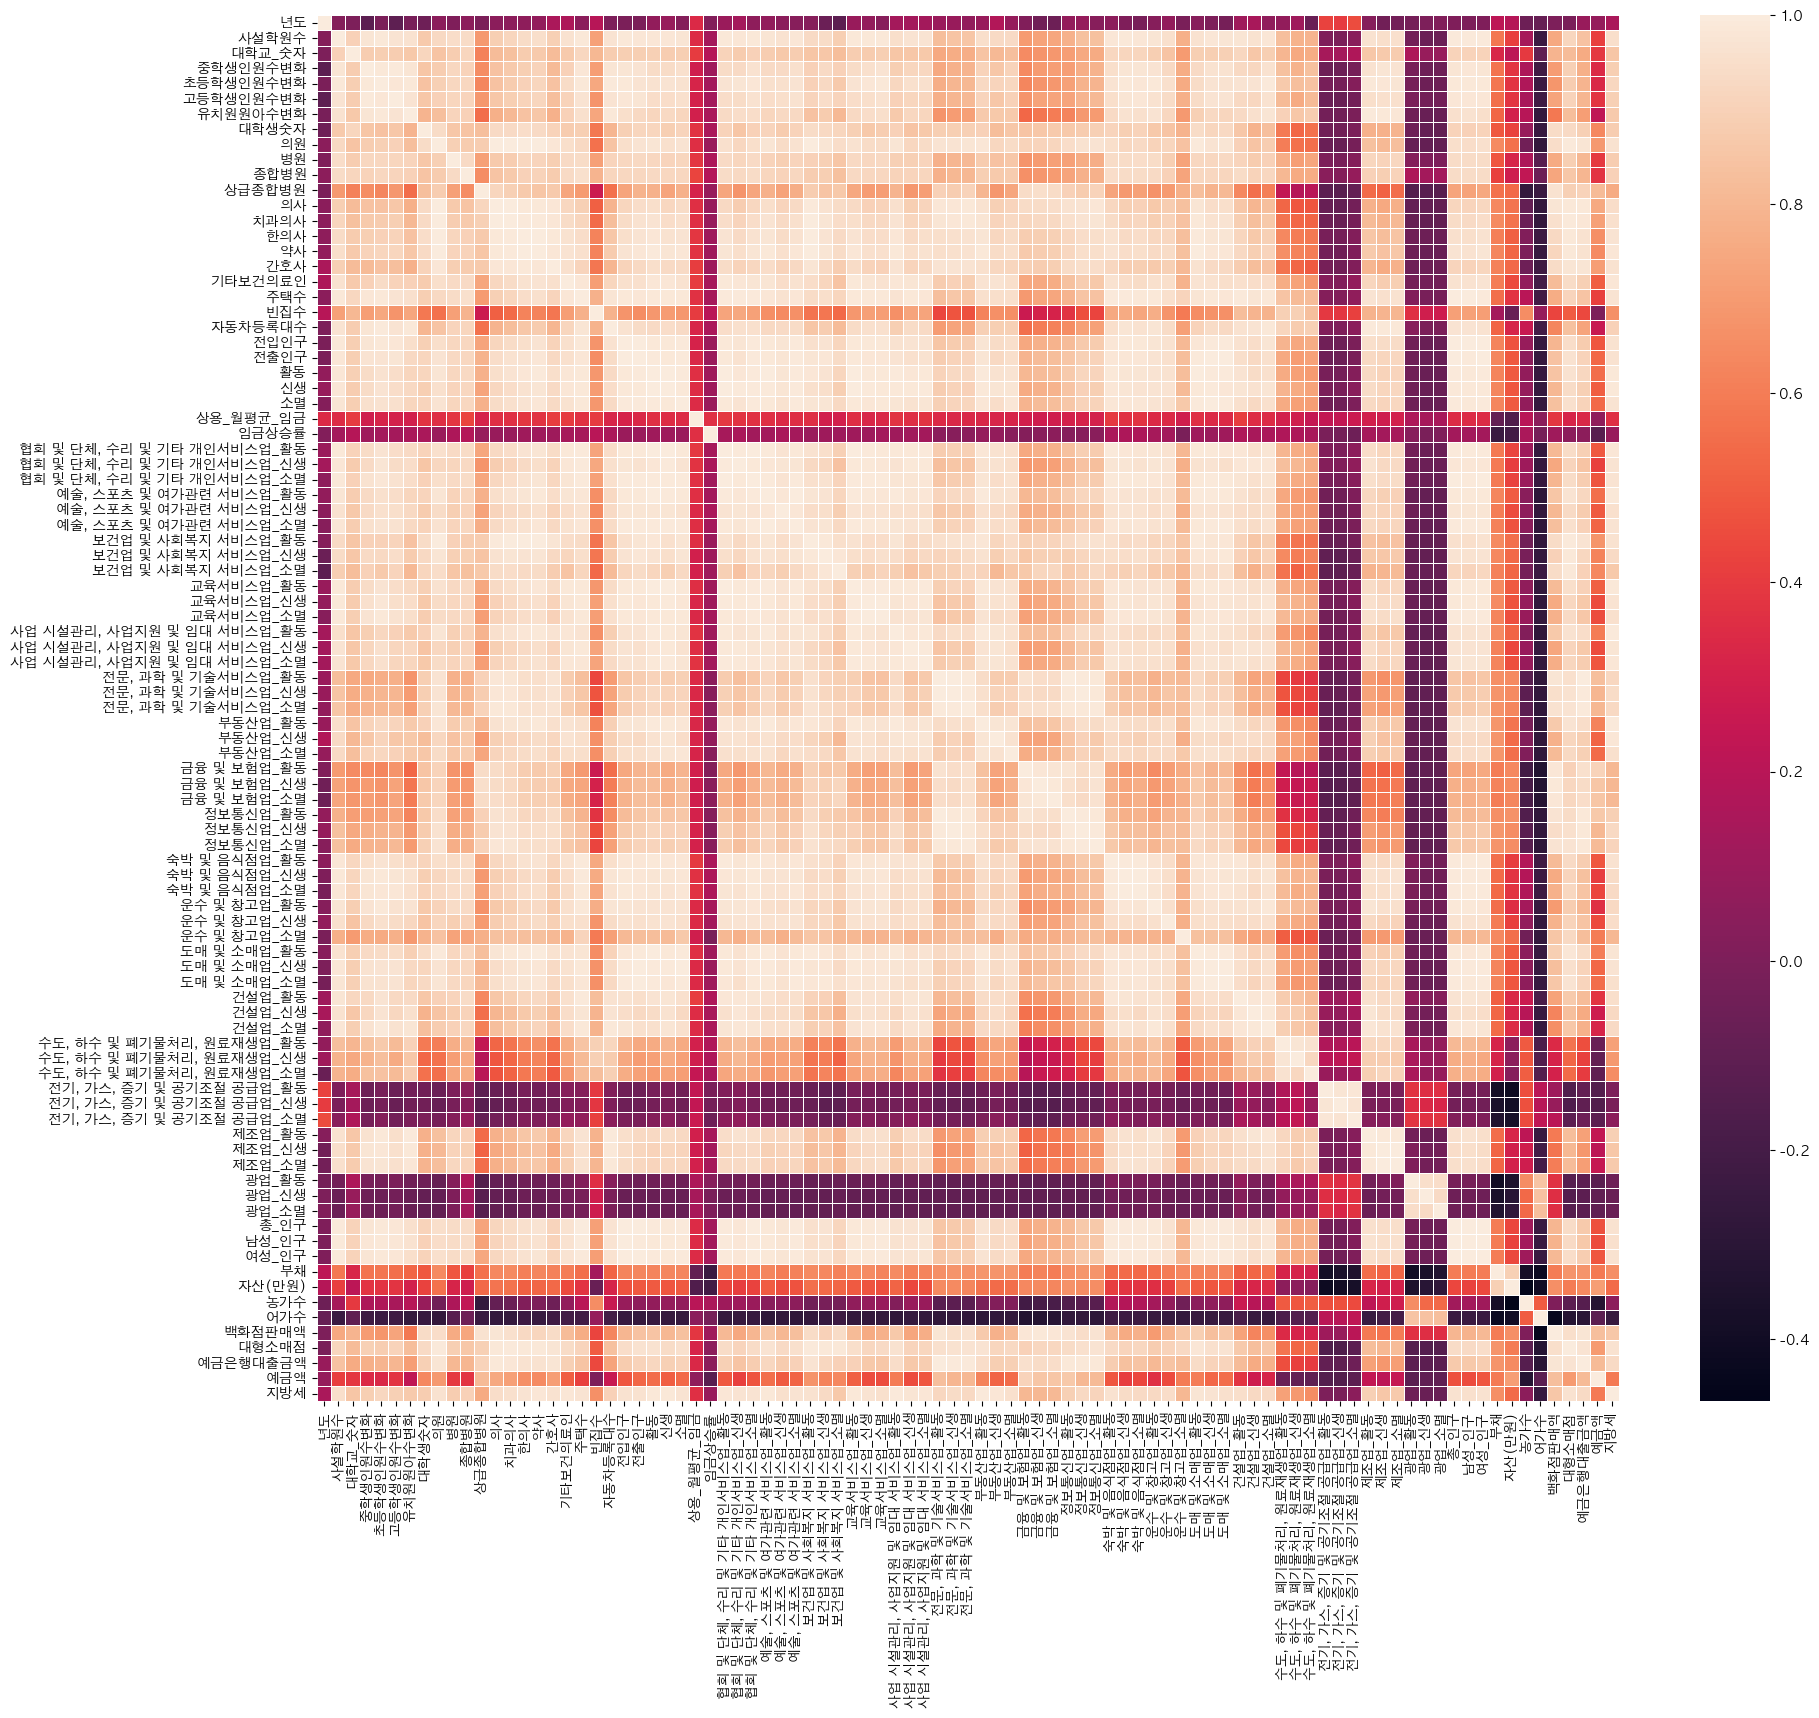

In [74]:
plt.figure(figsize = (21,18))

sns.heatmap(
    df.corr(),
    # annot=True,
    annot_kws={"size": 10},
    linewidths= 0.5,
)
    
plt.show()

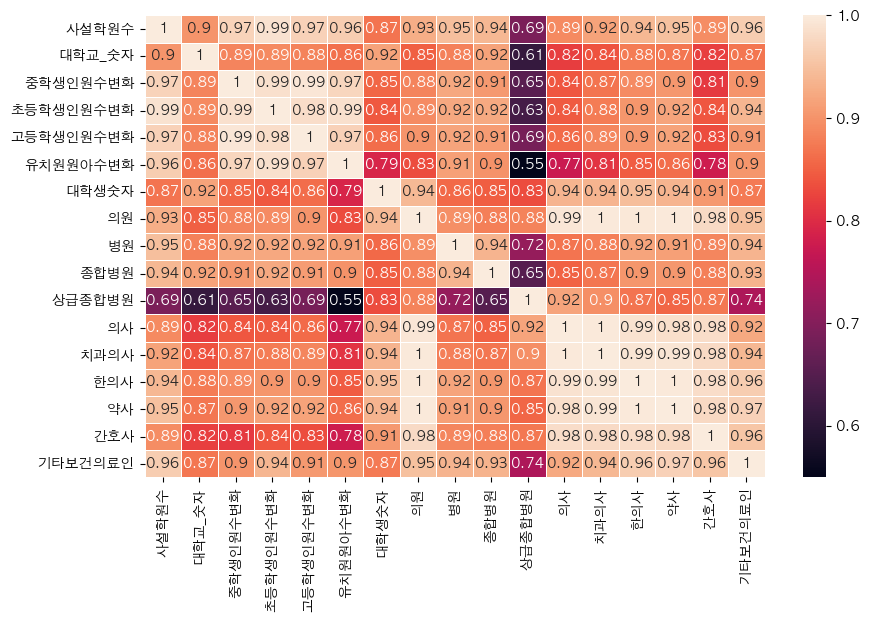

In [75]:
makeCorrHeatMap(2, 19)

In [76]:
df

,년도,시도,사설학원수,대학교_숫자,중학생인원수변화,초등학생인원수변화,고등학생인원수변화,유치원원아수변화,대학생숫자,의원,...,여성_인구,부채,자산(만원),농가수,어가수,백화점판매액,대형소매점,예금은행대출금액,예금액,지방세
0,2013,경기도,18134,62,458220,739619,460580,182231,499221,5876,...,6075437,NaN,NaN,133012.0,853.0,NaN,NaN,248468.3,13718.5,13301235.0
1,2013,서울특별시,13405,48,304251,469392,334123,92400,570583,7505,...,5135776,NaN,NaN,2826.0,NaN,NaN,NaN,462443.1,532689.2,12980600.0
2,2013,경상남도,5662,20,124566,190166,122060,50370,129823,1481,...,1655228,NaN,NaN,136708.0,9346.0,NaN,NaN,57288.6,6703.3,3605279.0
3,2013,부산광역시,4638,22,110454,160821,105310,44217,274955,2119,...,1780635,NaN,NaN,7178.0,2061.0,NaN,NaN,77411.6,59554.5,3401445.0
4,2013,대구광역시,3639,11,94394,136309,103666,34550,130792,1576,...,1255517,NaN,NaN,17717.0,NaN,NaN,NaN,46578.5,37541.7,2148115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,2020,충청북도,2232,17,41458,85135,42488,16049,116655,897,...,789246,5547.0,30193.0,66425.0,NaN,NaN,1038923.0,28669.1,27669.5,2770501.0
132,2020,대전광역시,2198,15,40694,79807,41549,22132,134526,1090,...,733183,6562.0,36864.0,13491.0,NaN,996096.0,2049133.0,39341.3,38725.4,2252393.0
133,2020,강원도,2179,17,37836,73478,39806,14679,116054,779,...,766335,5619.0,34307.0,67436.0,1698.0,NaN,1007019.0,22831.4,23634.2,2653723.0
134,2020,제주특별자치도,1051,4,19468,40575,18679,6395,28773,456,...,336026,7869.0,52147.0,30365.0,3001.0,NaN,512463.0,20182.3,14025.4,1601823.0
